In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
os.chdir(r"C:\Users\ghosa\Projects\ML\ass1\iris")

In [3]:
dataset = pd.read_csv("iris.data")
dataset.head()

,s_length(cm),s_width(cm),p_length(cm),p_width(cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [5]:
train, test = train_test_split(dataset, test_size = 0.4)
X_train = train[['s_length(cm)','s_width(cm)','p_length(cm)','p_width(cm)']]
y_train = train.species
X_test = test[['s_length(cm)','s_width(cm)','p_length(cm)','p_width(cm)']]
y_test = test.species

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
classifier = DecisionTreeClassifier(criterion="entropy",max_depth=20)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [8]:
from sklearn.metrics import classification_report,confusion_matrix

In [9]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix:
[[19  0  0]
 [ 0 19  2]
 [ 0  3 17]]


In [10]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.86      0.90      0.88        21
 Iris-virginica       0.89      0.85      0.87        20

       accuracy                           0.92        60
      macro avg       0.92      0.92      0.92        60
   weighted avg       0.92      0.92      0.92        60



In [11]:
from sklearn import tree
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.55
|   |   |--- class: Iris-versicolor
|   |--- feature_3 >  1.55
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.00
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.00
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



In [12]:
from sklearn.tree import plot_tree

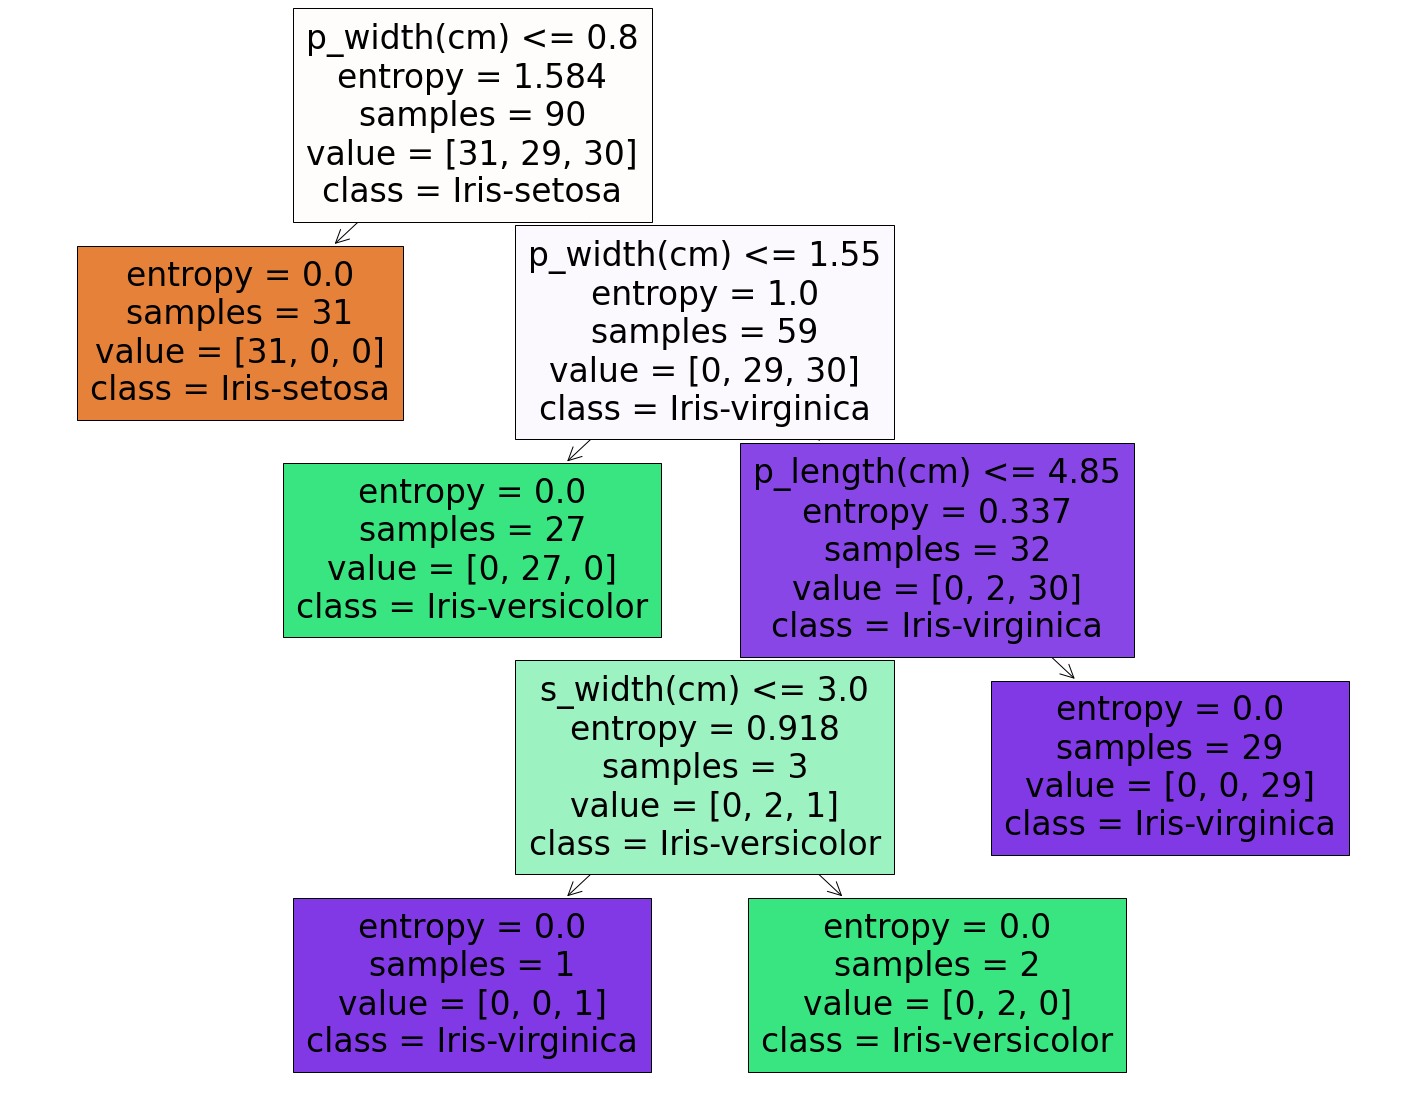

In [14]:
fig=plt.figure(figsize=(25,20))
fig= plot_tree(classifier, 
      feature_names = ["s_length(cm)", "s_width(cm)", "p_length(cm)", "p_width(cm)"],
      class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], filled = True) #
plt.savefig("iris_1.png")